In [115]:
deceleration = 1.01
coef2 = 10

In [116]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FixedLocator
import numpy as np
from numpy import vectorize

base_pos = 2+2j

In [117]:
masc = [0, 3, 6, 9]
masl = [-1.5, 1.5, 4.5, 7.5, 10.5]
v = 0.0005
c1 = 1.9
c2 = 0.9

def rule(x, i):
    if i == 0:
        if x <= masl[0]:
            return 1
        elif x > masl[0] and x < masl[1]:
            return (masl[1] - x) / (masl[1] - masl[0])
    elif i == 4:
        if x >= masl[4]:
            return 1
        elif x > masl[3] and x < masl[4]:
            return (x - masl[3]) / (masl[4] - masl[3])
    else:
        if x > masl[i-1] and x < masl[i]:
            return (x - masl[i-1]) / (masl[i] - masl[i-1])
        elif x > masl[i] and x < masl[i+1]:
            return (masl[i+1] - x) / (masl[i+1] - masl[i])
    return 0

def axy(i, j):
    ans = 0
    # Переделать
    if j == 0:
        ans += c1
    elif j == 1: #or j == 2:
        ans += c2
    elif j == 3:
        ans -= c2
    elif j == 4:
        ans -= c1
    
    if i == 0:
        ans += c1*(1j)
    elif i == 1: #or i == 2:
        ans += c2*(1j)
    elif i == 3:
        ans -= c2*(1j)
    elif i == 4:
        ans -= c1*(1j)
    
    return ans

def rules(x, y):
    masx = []
    masy = []
    for i in range(5):
        for j in range(5):
            vx = rule(x, j)
            vy = rule(y, i)
            if vx != 0 and vy != 0:
                # print(i, j, x, vx, axy(i,j))
                masx.append(axy(i,j) * vx) 
                masy.append(axy(i,j) * vy) 
    ans = np.average(masx) + np.average(masy) * (1j)
    return ans / abs(ans+0.5)

def vec(pos):
    x_full = pos.real
    y_full = pos.imag
    return rules(x_full, y_full) * v
    
    

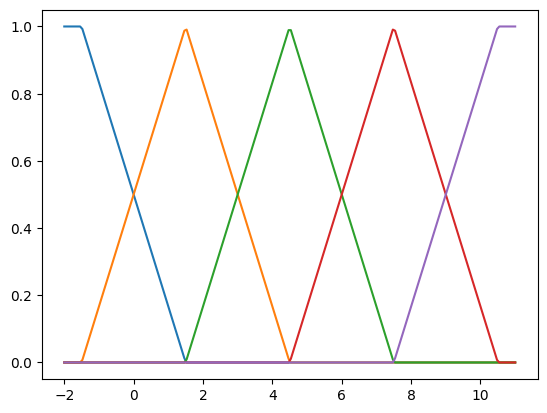

In [118]:
x = np.linspace(-2,11,200)
for i in range(5):
    V1 = vectorize(lambda x: rule(x, i), otypes=[np.float64])   
    plt.plot(x, V1(x))
# V1 = vectorize(lambda x: rule(x, 1), otypes=[np.float64])   
# plt.plot(x, V1(x))

In [119]:
def move(pos, speed):
    acceleration = vec(pos)
    # print('acc',acceleration)
    speed += acceleration
    speed /= deceleration
    pos += speed
    return pos, speed

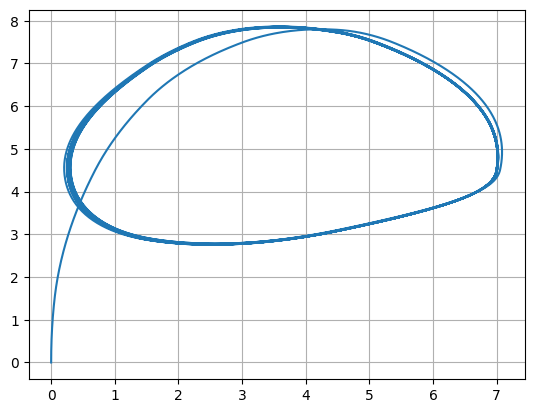

In [120]:
pos = 0
speed = 0 
wayx = [pos.real]
wayy = [pos.imag]
for t in range(10000):
    pos, speed = move(pos, speed)
    wayx.append(pos.real)
    wayy.append(pos.imag)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(FixedLocator([i for i in range(10)]))
ax.yaxis.set_major_locator(FixedLocator([i for i in range(10)]))
ax.grid(True)
ax.plot(wayx, wayy)